**<center> <span style="color:#0F52BA;font-family:serif; font-size:42px;"> TELECOM CUSTOMER CHURN PREDICTION 📈</span> </center>**

# <span style="font-family:serif; font-size:36px;"> Content</span>

1. [Loading Librarires & data](#1)
2. [Understanding Data](#2)
3. [Data visualization](#3)
4. [Data PreProcessing](#4)
5. [Machine Learning models evaluation and selection](#5)
6. [Decile Analysis](#6)

<a id = 1> </a>

<span style="font-family:serif; font-size:28px;"> Loading Libraries & data</span>

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_curve, auc

In [2]:
data = pd.read_csv('Telcom_Customer_Churn.csv')

<a id = 2> </a>

<span style="font-family:serif; font-size:28px;"> Understanding data </span>

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Note:
1. We have three numerical columns which are (SeniorCitzen, Tenure, MonthlyCharges)
2. No Null values in any column

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data Columns description: 
  1. [Demographic data about Customer] :  Gender of citezen, It he has partner or dependents
  2. [Service Type data] : Phone and Internet service type and security and if he has tech support
  3. [Contract info] : Type and Valuen, and Payment method. 
  4. If He [churn] or not

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<a id = 3> </a>

<span style="font-family:serif; font-size:28px;"> Data visualization </span>

### We willl start by Categorical columns distribution

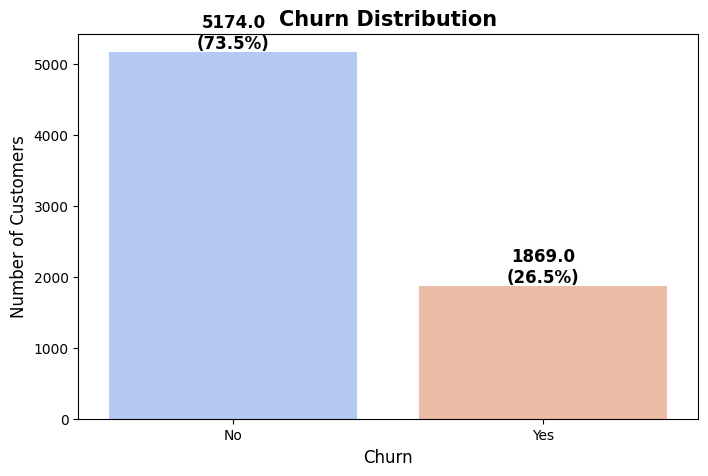

In [7]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Churn', palette='coolwarm')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

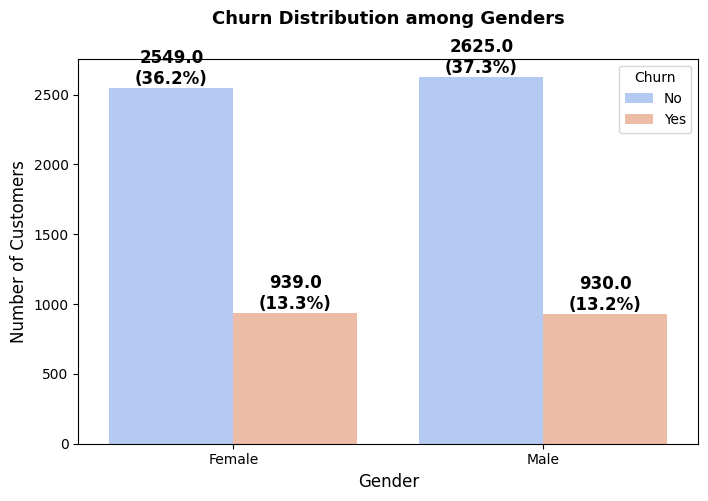

In [8]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='gender', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution among Genders', fontsize=13, fontweight='bold', loc='center', pad=25)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

It shown no effect of the gender on the customer churn 

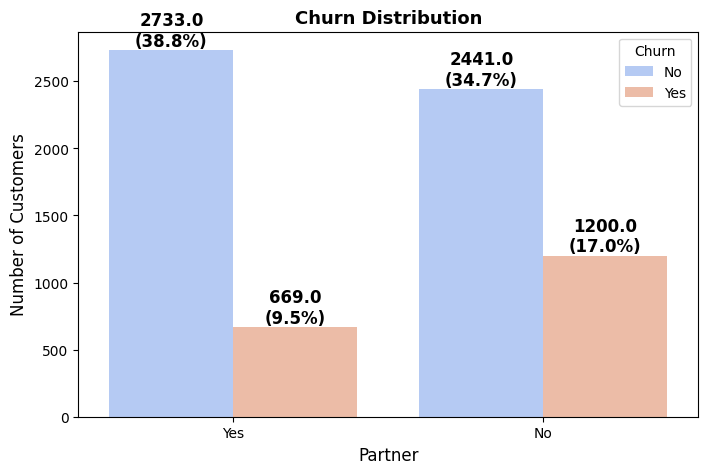

In [9]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Partner', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution', fontsize=13, fontweight='bold', loc='center')
plt.xlabel('Partner', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

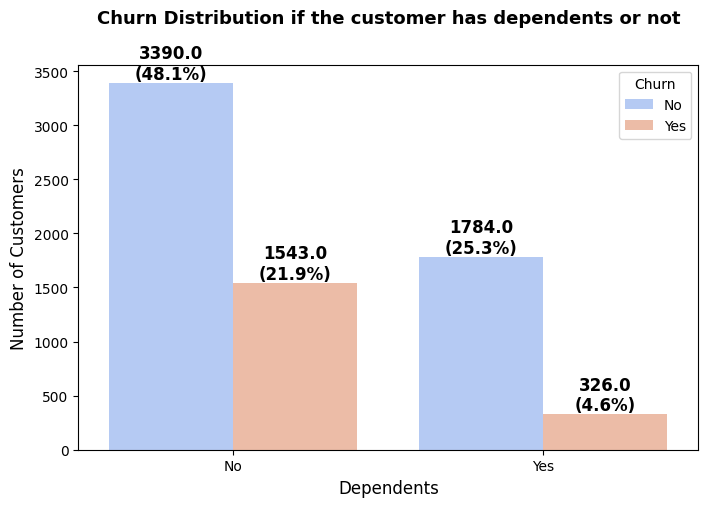

In [10]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Dependents', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution if the customer has dependents or not', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Dependents', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Customer who has not dependents more likely to churn than who has**

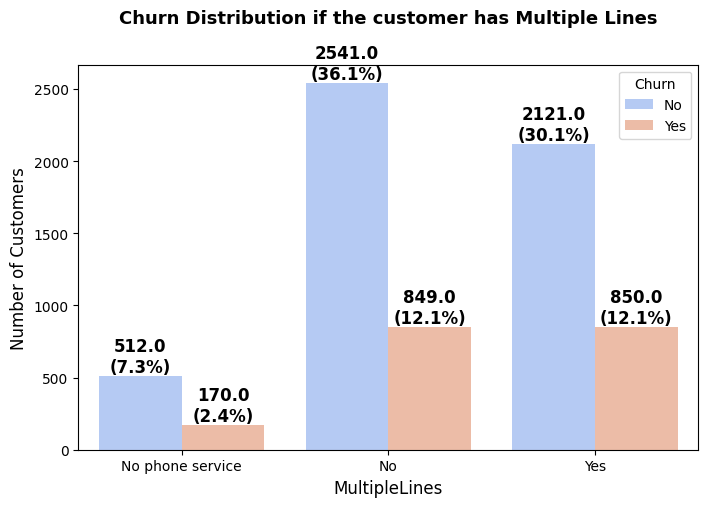

In [11]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='MultipleLines', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution if the customer has Multiple Lines', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('MultipleLines', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

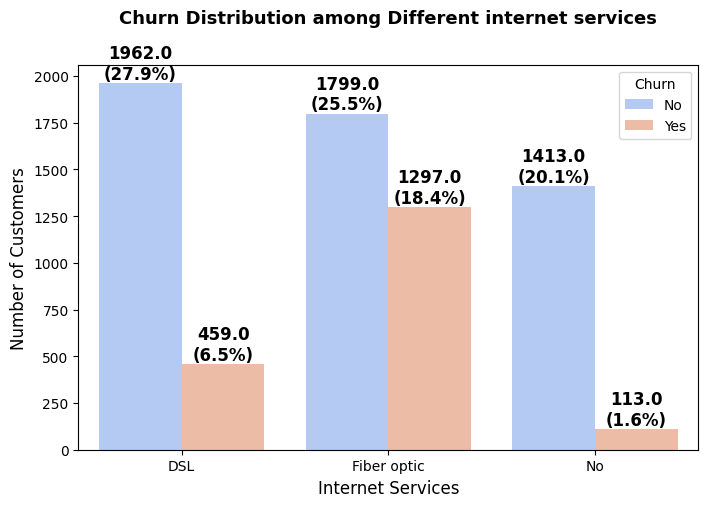

In [12]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='InternetService', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution among Different internet services', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Internet Services', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Customers with Fiber Optic internet service is more likely to churn**

In [13]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

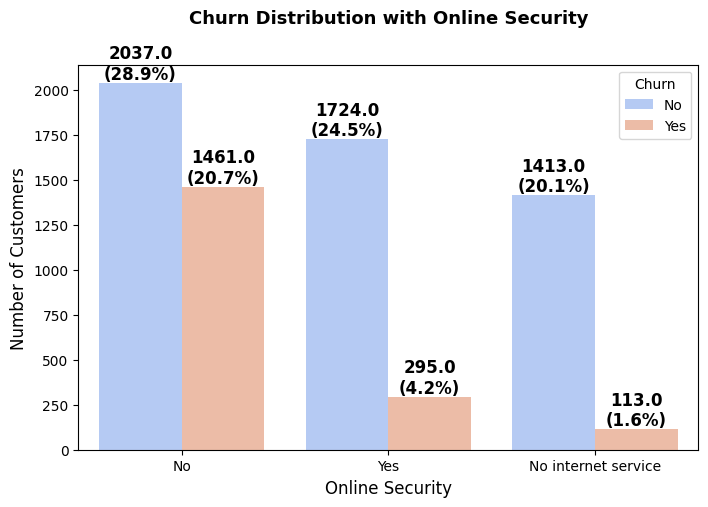

In [14]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='OnlineSecurity', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution with Online Security', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Online Security', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

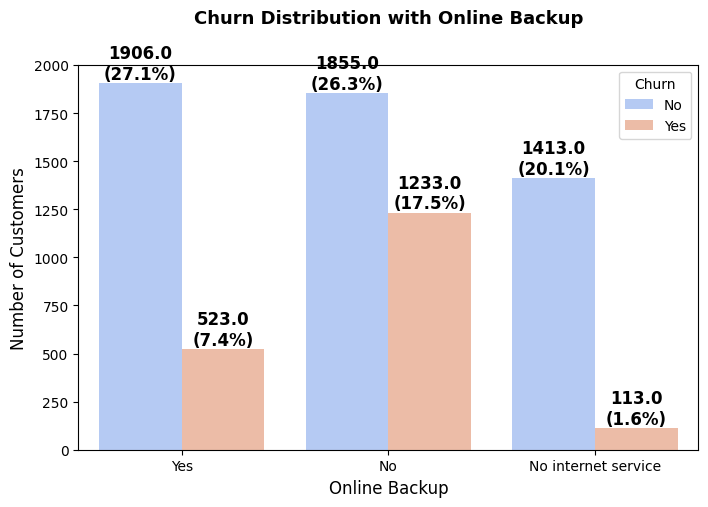

In [15]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='OnlineBackup', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution with Online Backup', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Online Backup', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

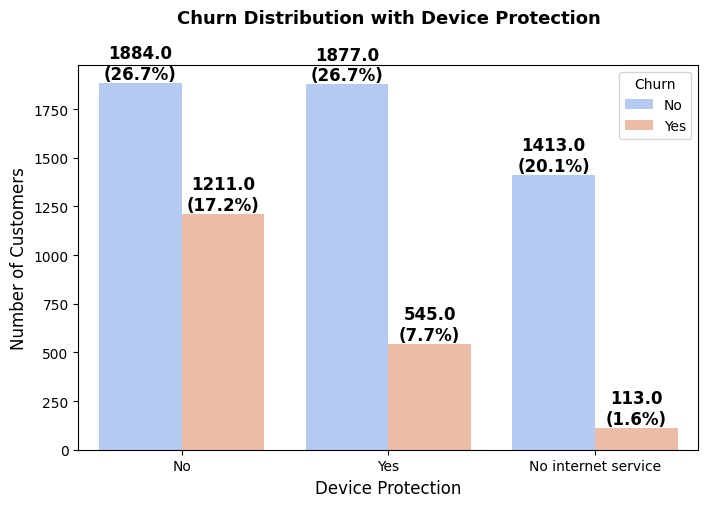

In [16]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='DeviceProtection', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution with Device Protection', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Device Protection', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### **Customers without Online Scurity, or online backup, or device protection is more likely to churn**

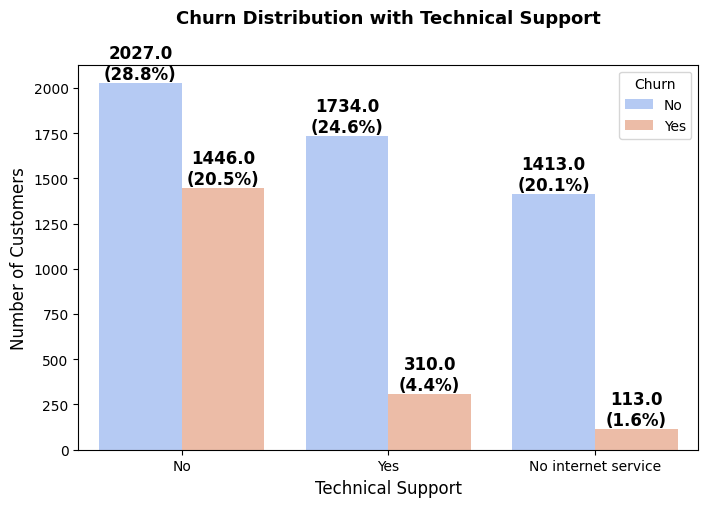

In [17]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='TechSupport', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution with Technical Support', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Technical Support', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

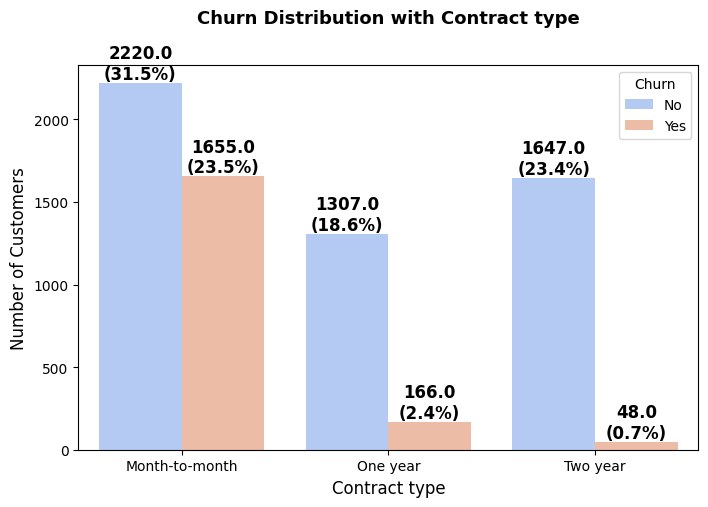

In [18]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Contract', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution with Contract type', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Contract type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Customer who subscripe month-to-month contract are more likely to churn than other**

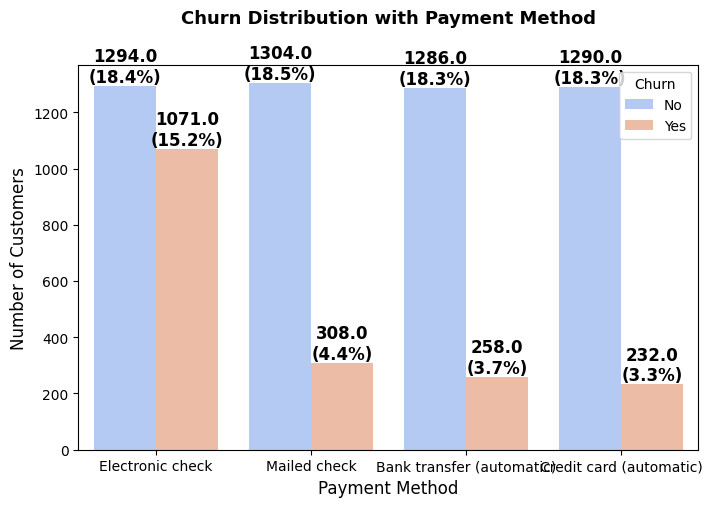

In [19]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='PaymentMethod', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution with Payment Method', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Customers that have Electronic check before payment are more likely to churn that Automatic payment or mailed check**

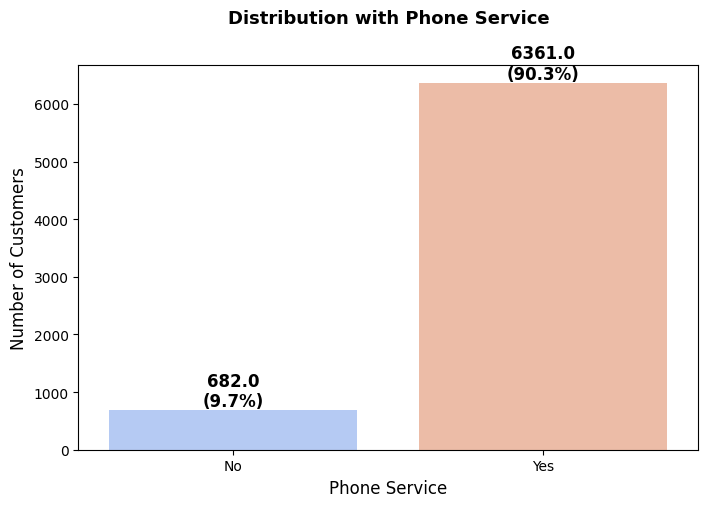

In [20]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='PhoneService', palette='coolwarm')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Distribution with Phone Service', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Phone Service', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Numerical Columns distribution density on Churn

C:\Users\Amr.Mohsen\.conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Amr.Mohsen\.conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """


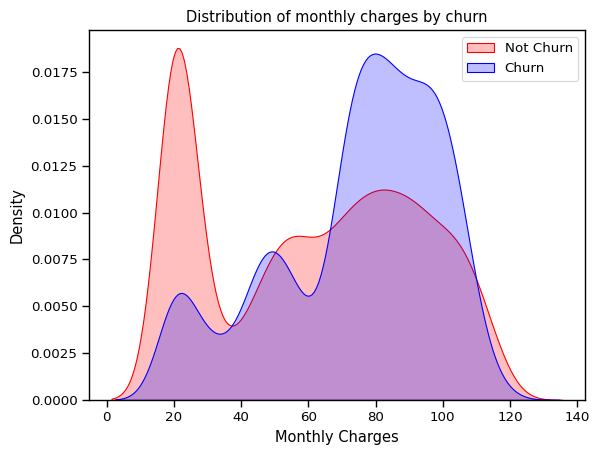

In [21]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

***Customer Who mde high monthly charges are more likely to churn than less***

C:\Users\Amr.Mohsen\.conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Amr.Mohsen\.conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """


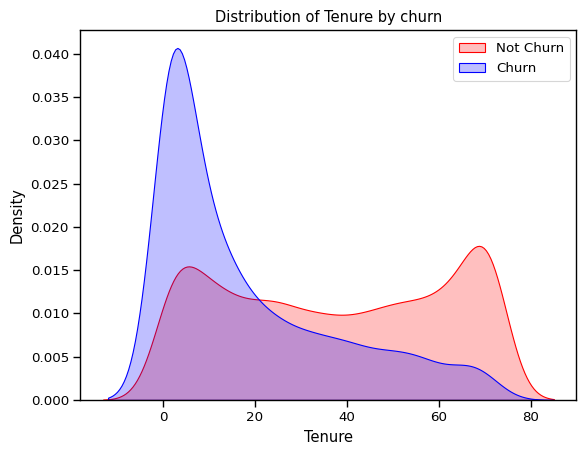

In [22]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.tenure[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.tenure[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of Tenure by churn');

***Customers who have less tenure are more likely to churn than others***

In [23]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

binary values in Senior Citxen, so we will deal with it as categorical column

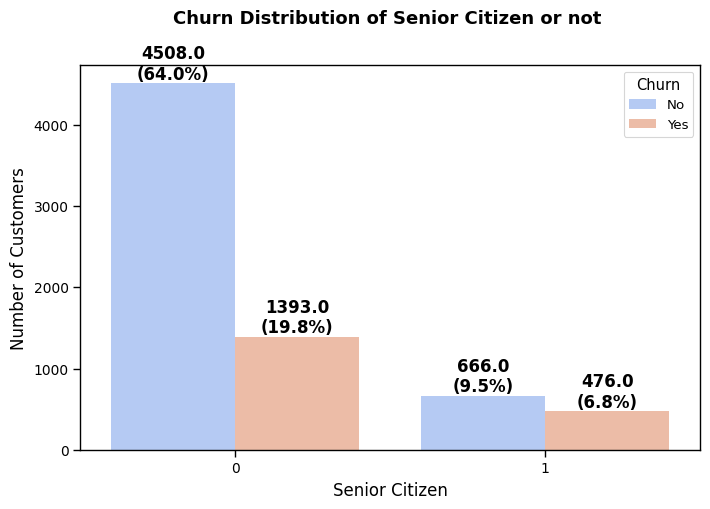

In [24]:
# Countplot with percentage
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='SeniorCitizen', palette='coolwarm', hue='Churn')

# Get total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = p.get_height()  # Get height of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Churn Distribution of Senior Citizen or not ', fontsize=13, fontweight='bold', loc='center', pad=30)
plt.xlabel('Senior Citizen', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Findings: 

1. ***Demographically***: Customers without Dependents are more likely to churn, Gender & Partner has no significant effect.
2. ***Service***: Customers with Fiber Optic internet service is more likely to churn than others, Phone service has no significant effect.
3. ***Security & Support***: Customers Who has not Online security or backup are more like to churn as well as Technical support. 
4. ***Contract Type***: "Month-to-Month" are the most common contract their customers churn, As well as Customers who get electronic check before payments are more likely to churn than other.
5. Customers who pay ***high charges monhtly*** are more likely to churn than others. 
6. Customers who has ***less tenure*** are more like to churn too.

<a id=4> </a>

<span style="font-family:serif; font-size:28px;"> Data Preprocessing </span>

In [25]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
data_cleaned = data.drop(labels='customerID', axis=1)

## Categorical Columns

In [27]:
# Change option 0 for No or no phone service and 1 for Yes in these four columns (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport)
data_cleaned['OnlineSecurity - No'] = 0
data_cleaned.loc[data_cleaned.OnlineSecurity == "Yes" , 'OnlineSecurity - No' ] = 1

data_cleaned['OnlineBackup - No'] = 0
data_cleaned.loc[data_cleaned.OnlineBackup == "Yes" , 'OnlineBackup - No' ] = 1

data_cleaned['DeviceProtection - No'] = 0
data_cleaned.loc[data_cleaned.DeviceProtection == "Yes" , 'DeviceProtection - No' ] = 1

data_cleaned['TechSupport - No'] = 0
data_cleaned.loc[data_cleaned.TechSupport == "Yes" , 'TechSupport - No' ] = 1

In [28]:
# Make a column to differentiate Fiber optic from Internet services to be 1 for "Fiber optic" and 0. 
data_cleaned['InternetService - fiber optic'] = 0
data_cleaned.loc[data_cleaned.InternetService == 'Fiber optic' , 'InternetService - fiber optic' ] = 1

#Make the Contract Month-To-Month column with zero and 1.
data_cleaned['Contract - monthTomonth'] = 0
data_cleaned.loc[data_cleaned.Contract == 'Month-to-month' , 'Contract - monthTomonth' ] = 1

# Make the Electronic check before payment a column itself with zero and 1 
data_cleaned['PaymentMethod - Electronic check'] = 0
data_cleaned.loc[data_cleaned.PaymentMethod == 'Electronic check' , 'PaymentMethod - Electronic check' ] = 1

In [29]:
# Change Yes and No in Dependents, and Churn columns to be 0 and 1. 
data_cleaned.loc[data_cleaned.Dependents == 'No' , 'Dependents' ] = 0
data_cleaned.loc[data_cleaned.Dependents == 'Yes' , 'Dependents' ] = 1

data_cleaned.loc[data_cleaned.Churn == 'No' , 'Churn' ] = 0
data_cleaned.loc[data_cleaned.Churn == 'Yes' , 'Churn' ] = 1

In [30]:
#Convert data type of these two columns to be integer.
data_cleaned.Churn=data_cleaned.Churn.astype(int)
data_cleaned.Dependents=data_cleaned.Dependents.astype(int)

In [31]:
# Based on the data , values of MonthlyCharges and Tenure columns are away from the rest of columns , so i need to Scale it 

columns_to_scale = ['MonthlyCharges', 'tenure']

scaler= StandardScaler()
data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])

In [32]:
# What is the correlation matrix of Churn with other columns

data_cleaned.corr()['Churn']

SeniorCitizen                       0.150889
Dependents                         -0.164221
tenure                             -0.352229
MonthlyCharges                      0.193356
Churn                               1.000000
OnlineSecurity - No                -0.171226
OnlineBackup - No                  -0.082255
DeviceProtection - No              -0.066160
TechSupport - No                   -0.164674
InternetService - fiber optic       0.308020
Contract - monthTomonth             0.405103
PaymentMethod - Electronic check    0.301919
Name: Churn, dtype: float64

### The more correlated columns to churn are 
* 'InternetService - fiber optic' with 0.3
* 'Contract - monthTomonth' with 0.4
* 'PaymentMethod - Electronic check' eith 0.3
* 'tenure' with -0.35

### Splitting the data to X and Y then to train and test

In [33]:
x= data_cleaned[['InternetService - fiber optic', 
                 'Contract - monthTomonth',
                 'PaymentMethod - Electronic check', 
                 'tenure']]

y = data_cleaned['Churn']

In [34]:
# Split the data 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 4)
(5634,)
(1409, 4)
(1409,)


<a id=5> </a>

<span style="font-family:serif; font-size:28px;"> Machine Learning models  </span>

### Random Forest

In [36]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
predictions = RF.predict_proba(X_test)
y_pred = (predictions[:,1] > 0.5).astype(int)

In [38]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



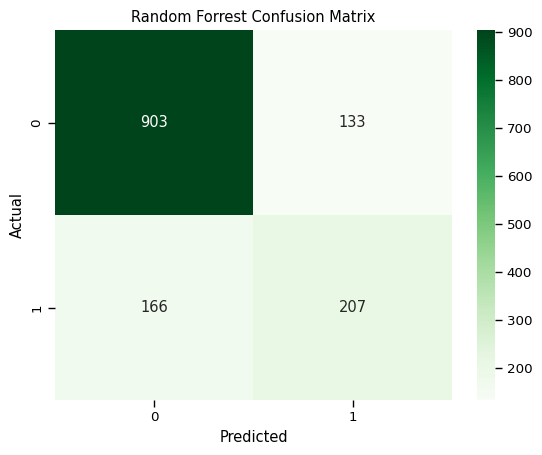

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forrest Confusion Matrix')
plt.show()

### XGBoost

In [40]:
xgb = XGBClassifier(scale_pos_weight=2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
predictions_xg = xgb.predict_proba(X_test)
y_pred_xg = (predictions_xg[:,1] > 0.5).astype(int)

In [42]:
print('Classification Report:\n', classification_report(y_test, y_pred_xg))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1036
           1       0.56      0.74      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



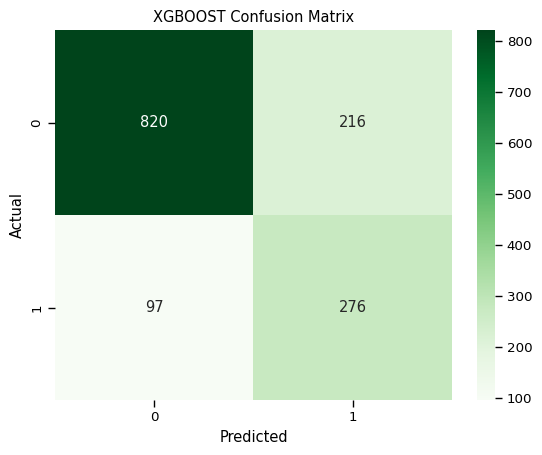

In [43]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xg)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBOOST Confusion Matrix')
plt.show()

### Logistic Regression

In [44]:
LG = LogisticRegression()
LG.fit(X_train, y_train)


predictions_lg = LG.predict_proba(X_test)
y_pred_lg = (predictions_lg[:,1] > 0.5).astype(int)

In [45]:
print('Classification Report:\n', classification_report(y_test, y_pred_lg))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



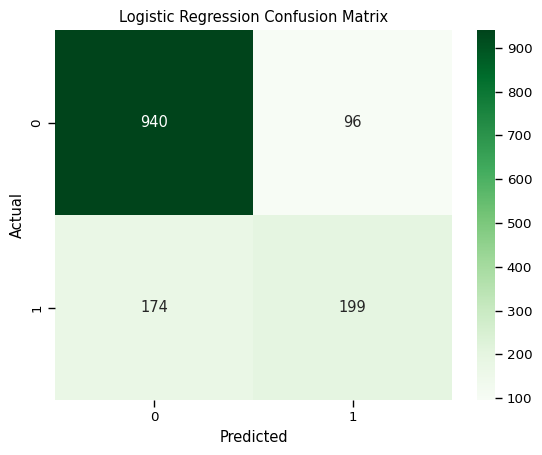

In [46]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lg)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

<span style="font-family:serif; font-size:20px;"> I am searching for high recall with not bad precision  </span>
* **Random Forest model** give me:
    * Recall: 55%
    * Precision: 61%
    * F1 score: 58%
    * Accuracy: 79%
* **XGBoost model** give me:
    * Recall: 74%
    * Precision: 56%
    * F1 score: 64%
    * Accuracy: 78%
* **Logistic Regression model** give me:
    * Recall: 53%
    * Precision: 67%
    * F1 score: 60%
    * Accuracy: 81%
    
   
**I Choose XGBoost model to be my model with good accuracy 78% and acceptable recall 74% without changing the percentage in predict proba to less than 0.5.**

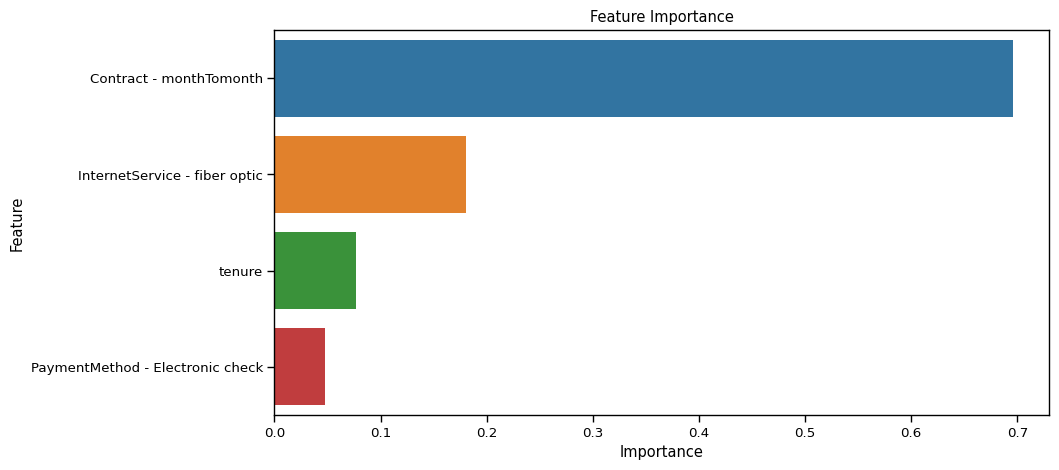

In [47]:
# Feature Importance
importances = xgb.feature_importances_
feature_names = x.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

*It shows that XGBoost model has features more important than others like "Contract - MonthToMonth"*

<a id = 6> </a>

<span style="font-family:serif; font-size:28px;"> Decile Analysis </span>

In [48]:
probabilities = xgb.predict_proba(X_test)[:,-1]

In [49]:
model_output = pd.DataFrame({
    'Model_probabilities' : probabilities
    ,'Actuals' : y_test
})

In [50]:
model_output = model_output.sort_values(by='Model_probabilities', ascending=False).reset_index().drop(columns='index')

In [51]:
model_output["decile"] = pd.qcut(model_output.index, 10, labels=False, duplicates="drop") + 1

model_output

,Model_probabilities,Actuals,decile
0,0.928514,1,1
1,0.928514,1,1
2,0.928514,1,1
3,0.928514,1,1
4,0.928514,1,1
...,...,...,...
1404,0.001086,0,10
1405,0.001086,0,10
1406,0.001086,0,10
1407,0.001086,0,10


In [52]:
result = model_output.groupby('decile').agg({"Actuals" : ['sum', 'count']}).reset_index().droplevel(1,axis=1)

In [53]:
result.columns = ['Decile', 'True Positives', 'All customers']

In [54]:
result['recall_per_decile'] = result['True Positives'] / result['True Positives'].sum()

In [55]:
# cumulative recall 
result['True_positives_cumulative'] = result['True Positives'].cumsum()

result['recall_cumulaitve'] = result['True_positives_cumulative'] / result['True Positives'].sum()

In [56]:
result

,Decile,True Positives,All customers,recall_per_decile,True_positives_cumulative,recall_cumulaitve
0,1,106,141,0.284182,106,0.284182
1,2,78,141,0.209115,184,0.493298
2,3,60,141,0.160858,244,0.654155
3,4,46,141,0.123324,290,0.777480
4,5,31,141,0.083110,321,0.860590
5,6,20,140,0.053619,341,0.914209
6,7,9,141,0.024129,350,0.938338
7,8,12,141,0.032172,362,0.970509
8,9,6,141,0.016086,368,0.986595
9,10,5,141,0.013405,373,1.000000


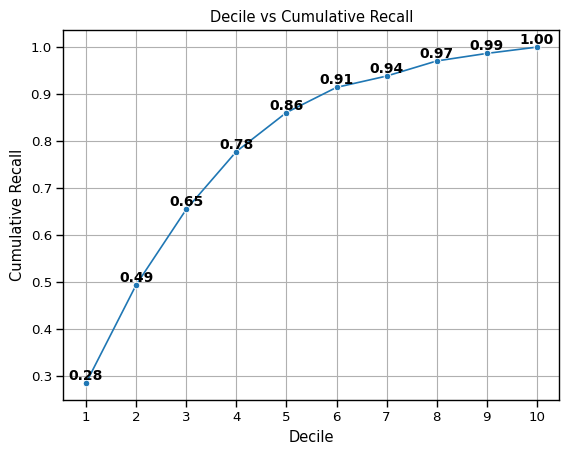

In [58]:
# Sample Line Plot
sns.lineplot(data=result, x='Decile', y='recall_cumulaitve', marker='o')

# Ensure all deciles are shown
plt.xticks(result['Decile'])  # Set all decile labels

# Add data labels to each point
for x, y in zip(result['Decile'], result['recall_cumulaitve']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Show Plot
plt.xlabel("Decile")
plt.ylabel("Cumulative Recall")
plt.title("Decile vs Cumulative Recall")
plt.grid(True)
plt.show()


**I recommend That we can focus on the first Five deciles as after that fifth decile the increase in the recall is very small.**